# Getting started with Open CV

In this notebook you will learn how to do fundamental things with open cv, with respect to the given project of a squat analysis. We will need to: 

 + acess a camera
 + read an image/video from it
 + find markes in the respective frames


## 0 Packages

As always we need to import some packages so we can use their methods/functions

In [2]:
import matplotlib.pyplot as plt
import cv2


To check whether Opven CV was imported correctly, we check the version of Open CV

In [3]:
print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.12.0


## 1 Acessing The Camera

As we need to see an athlete doing a squat, we need a camera. So let's check which camera devices are available.

In [16]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Cannot open camera")
else:
    print("A camera was opened")

A camera was opened


## 2 Read A Frame From The Camera

As a camera was opened we would like to get an image from it. We do this using Open CV's method .read() on the camera object cap

In [5]:
ret, frame = cap.read()

Now we need to show the frame so we know what we have recorded. We use the .imshow() method of Open CV

In [6]:
cv2.imshow('This is the recorded frame', frame)

# warte bis 'q' gedrückt wird
while True:
    # 1 ms warten, Events verarbeiten
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## 3 Find Markers

As we would like to find markers at some point we need to define the markers properties first. There are several options available starting from color markers over infrared to patternbased ones. ArUco Markers are a classic marker type for this kind of tracking. Therefore we will go with them. What is an ArUco Code and what can we do with it? Well. Let's create an ArUco code on our own.

ArUco codes often come in form of a dictionary. A 6x6 ArUco code has 6 rows and 6 columns with either black or white cells. The dictionary contains all available versions that respect the ArUco code boundary conditions. We can load such a dictionary by using Open CV

In [7]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

As a next step we want to use one of the markers in the dictionary. Of course, we want to use the number 42 as our index. Our reference image for the marker is 200. 

Source: geeksforgeeks.org

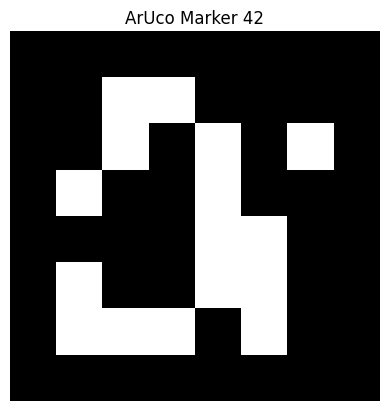

In [12]:

# Generate a marker
marker_id = 42
marker_size = 200  # Size in pixels
marker_image = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size)

cv2.imwrite('marker_42.png', marker_image)
plt.imshow(marker_image, cmap='gray', interpolation='nearest')
plt.axis('off')  # Hide axes
plt.title(f'ArUco Marker {marker_id}')
plt.show()

So let's create a new frame that contains an ArUco code that we can try to find

In [17]:
ret, frame = cap.read()
cv2.imshow('This is the recorded frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detecting ArUco markers involves several steps:

+ Loading the Image: Load the image containing the ArUco marker using OpenCV’s imread function.
+ Converting to Grayscale: Convert the image to grayscale to enhance the detection process.
+ Detecting Markers: Use the detectMarkers function from the cv2.aruco module to detect the markers in the image.

Source: geeksforgeeks.org

In [18]:
# Convert the image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters()

# Create the ArUco detector
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
# Detect the markers
corners, ids, rejected = detector.detectMarkers(gray)
# Print the detected markers
print("Detected markers:", ids)
if ids is not None:
    cv2.aruco.drawDetectedMarkers(frame, corners, ids)
    cv2.imshow('Detected Markers', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Detected markers: [[42]
 [40]
 [41]
 [38]
 [39]]


The first steps were carried out in this notebook to be able to detect an ArUco code and therefore we have the base for a squat analysis. Check out https://www.geeksforgeeks.org/detecting-aruco-markers-with-opencv-and-python-1/
for details about pose estimation with ArUco Codes and camera calibration